# Estudo de Correlação

**Respondendo à pergunta:** Desnidade populacional, verticalização e densidade construtiva são autocorrelacionados?

Abaixo, uma análise geográfica das bases do Censo de 2010, território, verticalização e transporte.

In [26]:
## Importar Bibliotecas
import geopandas as gpd
import fiona as f
from pointpats import PointPattern
import matplotlib.pyplot as plt
import numpy as np
import contextily

In [2]:
## Importar dados
# Censo 2010
censo2010 = gpd.read_file('data/Censo2010/SetorCenso2010.shp')

# Divisao Territorial
distritos = gpd.read_file('data/DivisaoTerritorial/Distritos/DistritosRMSP_DadosCenso2010_SIRGAS.shp')

# Verticalizacao
verticalizacao = gpd.read_file('data/Verticalizacao/PrediosMSP_geolocalizados.shp')

In [3]:
distritos.head()

,ID,NOMEMUN,NOMEDIS,AreaKm2,Domic,DPP,DPPCasa,DPPApt,DPPQuit,DPPAqui,...,DPPLxCl,DPPLxSL,DPI,Pop,PopAlfa,RndTtlR,RspCmRn,Resp,RspMSlr,geometry
0,1.0,SANTA ISABEL,SANTA ISABEL,362.660932,15474,15299,15221,55,9636,202,...,14699,12481,14,50453,43128,15176640,13044,15315,387,"POLYGON ((369759.993 7412908.068, 369744.314 7..."
1,2.0,MOGI DAS CRUZES,BIRITIBA-USSU,69.817326,1345,1342,1336,0,910,12,...,1272,1077,3,4730,3988,1195470,1118,1345,32,"POLYGON ((387489.436 7377257.474, 387348.155 7..."
2,3.0,BIRITIBA-MIRIM,BIRITIBA-MIRIM,317.585793,8407,8400,8387,1,4955,233,...,7937,7837,6,28575,23967,8363006,7574,8407,250,"POLYGON ((388050.258 7377198.245, 388111.737 7..."
3,4.0,SALESOPOLIS,SALESOPOLIS,363.137316,3762,3721,3649,4,2518,23,...,3533,3189,6,12479,10516,3593911,3182,3672,152,"POLYGON ((406084.719 7382648.747, 406070.225 7..."
4,5.0,GUARAREMA,GUARAREMA,271.261880,7882,7759,7610,147,4213,409,...,7583,6832,10,25844,22272,9180803,6794,7770,125,"POLYGON ((397927.527 7398491.038, 397788.472 7..."


In [18]:
itaimbibi = distritos.loc[distritos['NOMEDIS'] == 'ITAIM BIBI']

In [30]:
censo_itaimbibi = gpd.sjoin(itaimbibi, censo2010, op='contains')['NOMEDIS', 'Pop_Dns', 'geometry'].drop_duplicates()

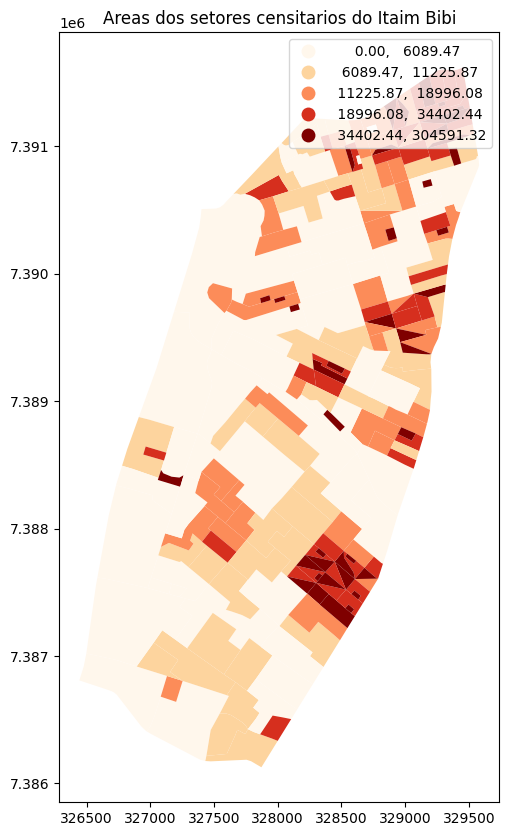

In [32]:
fig, grafico = plt.subplots(figsize=(10, 10))
# itaimbibi.plot(ax=grafico, color='white', edgecolor='black', linewidth=0.3)
censo_itaimbibi.plot(ax=grafico, column='Pop_Dns', scheme='quantiles', cmap='OrRd', legend=True)
grafico.set_title('Areas dos setores censitarios do Itaim Bibi')
plt.show()

In [22]:
censo_itaimbibi.shape

(208, 80)

(array([18., 24., 25., 18., 18., 18., 12.,  5.,  9.,  9.,  9.,  3.,  6.,
         3.,  2.,  1.,  2.,  2.,  4.,  3.,  2.,  1.,  0.,  2.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([     0.        ,   3045.91320833,   6091.82641667,   9137.739625  ,
         12183.65283334,  15229.56604167,  18275.47925001,  21321.39245834,
         24367.30566668,  27413.21887501,  30459.13208335,  33505.04529168,
         36550.95850002,  39596.87170835,  42642.78491669,  45688.69812502,
         48734.61133336,  51780.52454169,  54826.43775003,  57872.35095836,
         60918.2641667 ,  63964.17737503,  67010.09058

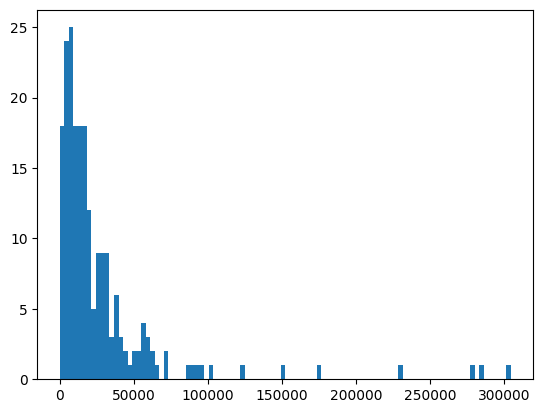

In [25]:
plt.hist(censo_itaimbibi['Pop_Dns'], bins=100)